In [1]:
import johnny_deep
import numpy as np
from importlib import reload
import warnings
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/falkvandermeirsch/Documents/DSR/11.Neural_networks_from_scratch/johnny_deep/utils.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()

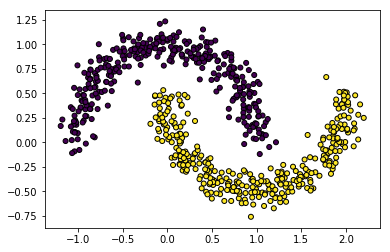

In [6]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [7]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
#     {"dimension": 20, "type": "linear"},
#     {"dimension": 20, "type": "sigmoid"},
#     {"dimension": 20, "type": "sigmoid"},
#     {"dimension": 20, "type": "sigmoid"},
# WORKSHOP #5: code ReLU activation function
    {"dimension": 20, "type": "relu"},
    {"dimension": 20, "type": "relu"},
    {"dimension": 20, "type": "relu"},
    {"dimension": 1, "type": "sigmoid"},
]

In [8]:
m = johnny_deep.models.Model(nn_architecture)

In [9]:
m.model_info()

Layer 1: relu with dimension 20
W shape: (20, 2)
b shape: (20, 1)
Layer 2: relu with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 3: relu with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 4: sigmoid with dimension 1
W shape: (1, 20)
b shape: (1, 1)


In [10]:
m.fit(X_train, Y_train, 2000, 0.2, mini_batch_size=32)

Epoch 100 - cost 7.192156592517747e-13
Epoch 200 - cost 3.4902890762786687e-13
Epoch 300 - cost 2.49415534522029e-13
Epoch 400 - cost 1.970056062728454e-13
Epoch 500 - cost 1.6635789967804745e-13
Epoch 600 - cost 1.4722389973801243e-13
Epoch 700 - cost 1.3282130025459238e-13
Epoch 800 - cost 1.2155045488647112e-13
Epoch 900 - cost 1.1267028976471069e-13
Epoch 1000 - cost 1.0485431967134695e-13
Epoch 1100 - cost 9.844208781474424e-14
Epoch 1200 - cost 9.310237765922256e-14
Epoch 1300 - cost 8.830228215296166e-14
Epoch 1400 - cost 8.405105315450014e-14
Epoch 1500 - cost 8.041484145238838e-14
Epoch 1600 - cost 7.742811021968252e-14
Epoch 1700 - cost 7.420036807204767e-14
Epoch 1800 - cost 7.144030737353631e-14
Epoch 1900 - cost 6.895733983825437e-14
Epoch 2000 - cost 6.674984639095758e-14


[array([[1.00000000e+00, 1.38727305e-53, 1.00000000e+00, 1.27963207e-52,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.58129169e-45,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.22701876e-14,
         1.00000000e+00, 5.64049238e-24, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 7.50792999e-20, 1.00000000e+00, 1.00000000e+00,
         2.63959866e-14, 1.57258748e-64, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.32531960e-14,
         2.64850400e-15, 3.02324456e-45]]),
 array([[1.00000000e+00, 1.58962059e-51, 2.75846749e-35, 6.41197114e-24,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 3.72904914e-29, 1.00000000e+00, 3.78605910e-15,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.44815708e-47,
         1.25692653e-23, 1.01351567e-14, 3.47304913e-45, 1.01528025e-14,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       

In [11]:
# define grid
xx = np.linspace(X_train[0].min(), X_train[0].max(), 100)
yy = np.linspace(X_train[1].min(), X_train[1].max(), 100)
xy1, xy2 = np.meshgrid(xx, yy)
grid = np.vstack([xy1.flatten(), xy2.flatten()])

# make model
m3 = johnny_deep.models.Model(nn_architecture)
Y_hat_history = []
grid_history = []
no_epochs = 5000
for epoch in range(1,no_epochs+1):
    Y_hat = m3.forward(X_train)
    m3.back_propagation(Y_train)
    m3.optimization_step_rmsprop(learning_rate=0.2, beta=0.9)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        cost = johnny_deep.utils.get_cost_value(Y_hat, Y_train)
    if epoch % 100 == 0:
        Y_hat_history.append(Y_hat)
        grid_history.append(m3.forward(grid))
        #print("Epoch {} - cost {}".format(epoch, cost))

# define plot
def plot_w_boundary_background(m, background, X, Y_hat):
    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
    plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, edgecolor='k')

# make widget
from ipywidgets import interact

@interact(x=(0,no_epochs//100-1))
def f(x=0):
    return plot_w_boundary_background(m3, grid_history[x] ,X_train, Y_hat_history[x])

interactive(children=(IntSlider(value=0, description='x', max=49), Output()), _dom_classes=('widget-interact',…

In [5]:
Y[np.random.random(Y.shape[0]) < 0.3] = 1
Y[np.random.random(Y.shape[0]) < 0.3] = 0

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()

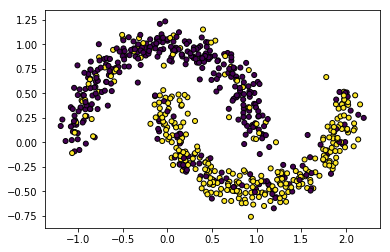

In [7]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [8]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
#     {"dimension": 20, "type": "linear"},
#     {"dimension": 20, "type": "sigmoid"},
#     {"dimension": 20, "type": "sigmoid"},
#     {"dimension": 20, "type": "sigmoid"},
# WORKSHOP #5: code ReLU activation function
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 50, "type": "relu"},
    {"dimension": 1, "type": "sigmoid"},
]
m2 = johnny_deep.models.Model(nn_architecture)
# define grid
xx = np.linspace(X_train[0].min(), X_train[0].max(), 100)
yy = np.linspace(X_train[1].min(), X_train[1].max(), 100)
xy1, xy2 = np.meshgrid(xx, yy)
grid = np.vstack([xy1.flatten(), xy2.flatten()])

In [9]:
Y_hat_history, grid_history = m2.fit(X_train, Y_train, 2000, 0.1, 
                                     mini_batch_size=32, optimization='momentum', 
                                     grid=grid)

Epoch 100 - cost 11.477227603687899
Epoch 200 - cost 10.788783300372815
Epoch 300 - cost 10.630981308146254
Epoch 400 - cost 10.55753638889563
Epoch 500 - cost 10.665572116470013
Epoch 600 - cost 10.277966639830215
Epoch 700 - cost 10.124925439547795
Epoch 800 - cost 10.095521570311632
Epoch 900 - cost 9.910961794605917
Epoch 1000 - cost 9.803717647885502
Epoch 1100 - cost 9.696590061186395
Epoch 1200 - cost 9.624855348679054
Epoch 1300 - cost 9.30122847223033
Epoch 1400 - cost 8.884234440036085
Epoch 1500 - cost 9.24618212056357
Epoch 1600 - cost 9.085762475385561
Epoch 1700 - cost 9.437181774625977
Epoch 1800 - cost 8.478804730454279
Epoch 1900 - cost 9.964633157910281
Epoch 2000 - cost 9.762859728890433


In [12]:
Y_hat_history[0].shape

(1, 30)

interactive(children=(IntSlider(value=0, description='x', max=19), Output()), _dom_classes=('widget-interact',…

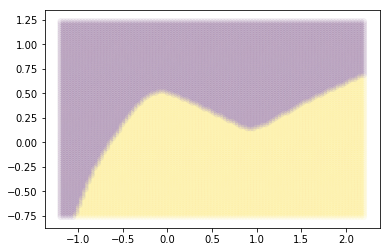

In [10]:
# define plot
def plot_w_boundary_background(m, background, X, Y_hat):
    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
    plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, edgecolor='k')

from ipywidgets import interact

@interact(x=(0,2000//100-1))
def f(x=0):
    return plot_w_boundary_background(m2, grid_history[x] ,X_train, Y_hat_history[x])

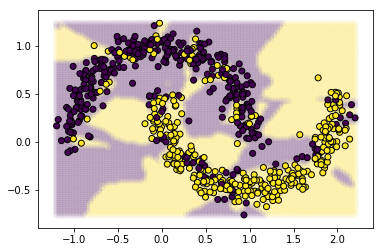

In [35]:
background = m2.forward(grid)
Y_hat = m2.forward(X_train).flatten()
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
background = johnny_deep.utils.convert_prob_into_class(background)
plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_pred, edgecolor='k')

In [19]:
# define grid
xx = np.linspace(X_train[0].min(), X_train[0].max(), 100)
yy = np.linspace(X_train[1].min(), X_train[1].max(), 100)
xy1, xy2 = np.meshgrid(xx, yy)
grid = np.vstack([xy1.flatten(), xy2.flatten()])

# make model
m3 = johnny_deep.models.Model(nn_architecture)
Y_hat_history = []
grid_history = []
no_epochs = 5000
for epoch in range(1,no_epochs+1):
    Y_hat = m3.forward(X_train)
    m3.back_propagation(Y_train)
    m3.optimization_step_rmsprop(learning_rate=0.2, beta=0.9)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        cost = johnny_deep.utils.get_cost_value(Y_hat, Y_train)
    if epoch % 100 == 0:
        Y_hat_history.append(Y_hat)
        grid_history.append(m3.forward(grid))
        #print("Epoch {} - cost {}".format(epoch, cost))

# define plot
def plot_w_boundary_background(m, background, X, Y_hat):
    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
    plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, edgecolor='k')

# make widget
from ipywidgets import interact

@interact(x=(0,no_epochs//100-1))
def f(x=0):
    return plot_w_boundary_background(m3, grid_history[x] ,X_train, Y_hat_history[x])

interactive(children=(IntSlider(value=0, description='x', max=49), Output()), _dom_classes=('widget-interact',…